In [1]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 885.9 kB/s eta 0:00:00


In [2]:
# import Python packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# import dataset
queens = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_queens.xlsx")
brooklyn = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_brooklyn.xlsx")
manhattan = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_manhattan.xlsx")
bronx = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_bronx.xlsx")
statenisland = pd.read_excel("../input/nyu-properties-price-june-2021-to-may-2022/rollingsales_statenisland.xlsx")

all_data = pd.concat([queens, brooklyn, manhattan, bronx, statenisland])

/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_queens.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_statenisland.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_bronx.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_brooklyn.xlsx
/kaggle/input/nyu-properties-price-june-2021-to-may-2022/rollingsales_manhattan.xlsx


In [3]:
# data cleaning for all_data
all_data.head()
all_data.info()
all_data.describe()

# According to all_data.info(), the following columns have NaN:
# TAX CLASS AT PRESENT
# EASEMENT (all values are missing, will not be using this column)
# BUILDING CLASS AT PRESENT 
# APARTMENT NUMBER
# ZIP CODE
# RESIDENTIAL UNITS
# COMMERCIAL UNITS
# TOTAL UNITS
# LAND SQUARE FEET
# GROSS SQUARE FEET
# YEAR BUILT

# According to all_data.describe(), the following columns have values equal to 0 which they should not have:
# Land square feet
# Gross square feet
# Sale price

# drop column EASEMENT and rows with NaN
# all_data.dropna(subset = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE'], inplace = True)
all_data = all_data.drop(columns = 'EASEMENT')
all_data.head()

# # drop unreasonable data
# # drop rows with LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, or SALE PRICE equals to 0
# all_data = all_data.loc[~((all_data['LAND SQUARE FEET'] == 0) | (all_data['GROSS SQUARE FEET'] == 0) | (all_data['YEAR BUILT'] == 0) | (all_data['SALE PRICE'] == 0))]


# split all_data into training and testing datasets for linear regression
training_data, testing_data = train_test_split(all_data, test_size = 0.2, random_state = 25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98270 entries, 0 to 9087
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         98270 non-null  int64         
 1   NEIGHBORHOOD                    98270 non-null  object        
 2   BUILDING CLASS CATEGORY         98270 non-null  object        
 3   TAX CLASS AT PRESENT            98210 non-null  object        
 4   BLOCK                           98270 non-null  int64         
 5   LOT                             98270 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       98210 non-null  object        
 8   ADDRESS                         98270 non-null  object        
 9   APARTMENT NUMBER                25280 non-null  object        
 10  ZIP CODE                        98268 non-null  float64       
 11  RES

In [4]:
# Step 1: understand the dataset

# shape of the training dataset and teh testing dataset
# training_data
# testing_data

# # understand the nature of teh training data
# training_data.info()
training_data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,78616.000000,78616.000000,78616.000000,78615.000000,59283.000000,43921.000000,61801.000000,4.140300e+04,4.140300e+04,72725.000000,78616.000000,7.861600e+04
mean,2.929086,4074.003447,408.647960,10837.452318,3.037076,0.354045,3.164949,6.114306e+03,5.915681e+03,1953.203699,1.662244,1.544340e+06
std,1.302123,3538.695714,677.451252,568.752950,21.753359,11.459417,23.424604,1.035243e+05,4.432646e+04,36.246795,0.784352,9.963449e+06
min,1.000000,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,1.000000,0.000000e+00
25%,2.000000,1216.000000,23.000000,10303.000000,1.000000,0.000000,1.000000,2.000000e+03,1.368000e+03,1925.000000,1.000000,0.000000e+00
50%,3.000000,3054.000000,53.000000,11208.000000,1.000000,0.000000,1.000000,2.500000e+03,1.962000e+03,1950.000000,2.000000,6.150000e+05
75%,4.000000,6111.250000,1008.000000,11355.000000,2.000000,0.000000,2.000000,4.000000e+03,2.842500e+03,1980.000000,2.000000,1.110000e+06
max,5.000000,16350.000000,9114.000000,11697.000000,800.000000,2261.000000,2261.000000,5.799632e+06,2.400000e+06,2022.000000,4.000000,9.310000e+08


In [5]:
# The following variables may need feature engineering:
# NEIGHBORHOOD
# BUILDING CLASS CATEGORY
# ADDRESS
# ZIP CODE

# After reading the glossary of terms, I decided to include the following columns for now:
# BOROUGH OR BLOCK OR LOT OR ZIP CODE OR NEIGHBORHOOD
# BUILDING CLASS AT TIME OF SALE
# TAX CLASS AT TIME OF SALE
# RESIDENTIAL UNIT
# COMMERCIAL UNIT
# TOTAL UNIT (Maybe)
# LAND SQUARE FEET
# GROSS SQUARE FEET
# YEAR BUILT (need feature engineering)

# drop rows with LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, or SALE PRICE equals to 0
training_data = training_data.loc[(training_data['LAND SQUARE FEET'] > 0) & (training_data['GROSS SQUARE FEET'] > 0) & (training_data['YEAR BUILT'] > 0)]

# drop rows with LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT
training_data.describe()

# training_data.describe().columns
df_num = training_data[['LAND SQUARE FEET', 'GROSS SQUARE FEET']]
# df_cat = training_data[['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT']]

                   LAND SQUARE FEET  GROSS SQUARE FEET
LAND SQUARE FEET           1.000000           0.588735
GROSS SQUARE FEET          0.588735           1.000000


<AxesSubplot:>

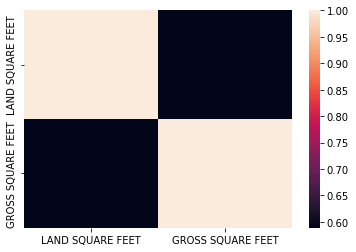

In [6]:
# use heatmap to see if LAND SQUARE FEET and GROSS SQUARE FEET are highly correlated
print(df_num.corr())
sns.heatmap(df_num.corr())

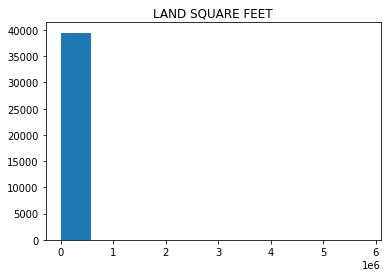

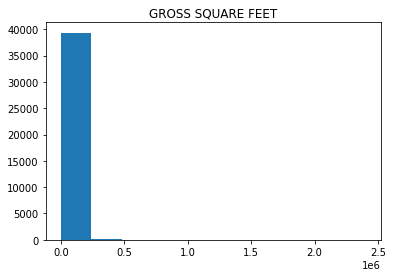

In [7]:
# since there is no strong correlation between LAND SQUARE FEET and GROSS SQUARE FEET
# I decided to include both variables into the model
# plot the distribution of the numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [8]:
# need to exclude outliers 
# in this case, outlier is defined as any value that is outside of the outter fence (Q3 + 3 * IQR)
# for LAND SQUARE FEET: 4000 + (3 * 2000) = 10000
# for GROSS SQUARE FEET: 2914 + (3 * 1474) = 7336
training_data = training_data.loc[(training_data['LAND SQUARE FEET'] < 10000) & (training_data['GROSS SQUARE FEET'] < 7336)]
training_data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,36937.000000,36937.000000,36937.000000,36937.000000,36937.000000,36937.000000,36937.000000,36937.000000,36937.000000,36937.00000,36937.000000,3.693700e+04
mean,3.560603,5575.729458,60.898313,11043.863849,1.832499,0.156753,1.989252,2917.686602,2195.137910,1941.16455,1.153586,7.168776e+05
std,0.935929,3639.293799,119.117792,445.252269,1.259087,11.771554,11.827400,1382.941821,1068.367028,30.06005,0.554573,1.848715e+06
min,1.000000,3.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,35.000000,1.000000,1800.00000,1.000000,0.000000e+00
25%,3.000000,2830.000000,20.000000,10469.000000,1.000000,0.000000,1.000000,2000.000000,1408.000000,1920.00000,1.000000,0.000000e+00
50%,4.000000,5191.000000,39.000000,11223.000000,2.000000,0.000000,2.000000,2500.000000,1944.000000,1931.00000,1.000000,5.620000e+05
75%,4.000000,7729.000000,64.000000,11373.000000,2.000000,0.000000,2.000000,3742.000000,2694.000000,1960.00000,1.000000,9.200000e+05
max,5.000000,16322.000000,3768.000000,11697.000000,43.000000,2261.000000,2261.000000,9992.000000,7328.000000,2021.00000,4.000000,1.760000e+08


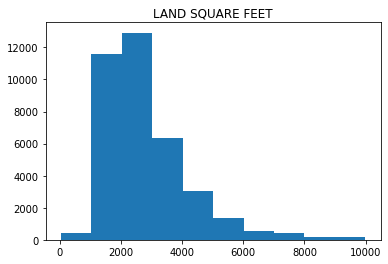

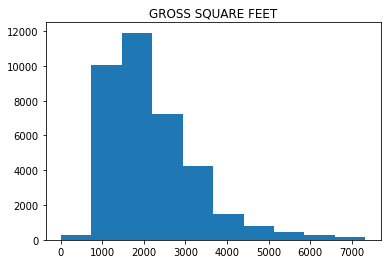

In [9]:
df_num = training_data[['LAND SQUARE FEET', 'GROSS SQUARE FEET']]
# df_cat = training_data[['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT']]
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [10]:
# both LAND SQUARE FEET and GROSS SQUARE FEET are right skewed
# use log transformation to normalize them
training_data['LAND SQUARE FEET'] = np.log(training_data['LAND SQUARE FEET'])
training_data['GROSS SQUARE FEET'] = np.log(training_data['GROSS SQUARE FEET'])

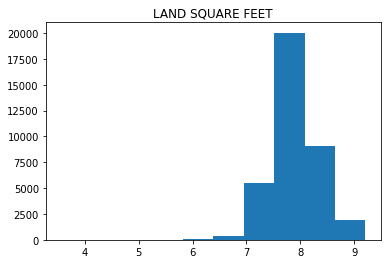

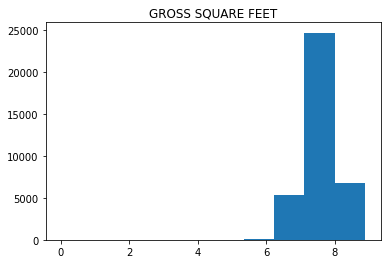

In [11]:
df_num = training_data[['LAND SQUARE FEET', 'GROSS SQUARE FEET']]
df_cat = training_data[['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT']]
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

                            BOROUGH     BLOCK       LOT  ZIP CODE  \
BOROUGH                    1.000000  0.120764 -0.005078  0.011299   
BLOCK                      0.120764  1.000000  0.028151  0.454364   
LOT                       -0.005078  0.028151  1.000000 -0.104505   
ZIP CODE                   0.011299  0.454364 -0.104505  1.000000   
TAX CLASS AT TIME OF SALE -0.139547 -0.131215 -0.033118 -0.024133   
RESIDENTIAL UNITS         -0.276629 -0.218228 -0.055284 -0.000950   
COMMERCIAL UNITS          -0.001233  0.003028 -0.002000  0.004241   
TOTAL UNITS               -0.030676 -0.020218 -0.007876  0.004120   
YEAR BUILT                 0.334877  0.085287  0.096102 -0.242125   

                           TAX CLASS AT TIME OF SALE  RESIDENTIAL UNITS  \
BOROUGH                                    -0.139547          -0.276629   
BLOCK                                      -0.131215          -0.218228   
LOT                                        -0.033118          -0.055284   
ZIP CODE 

<AxesSubplot:>

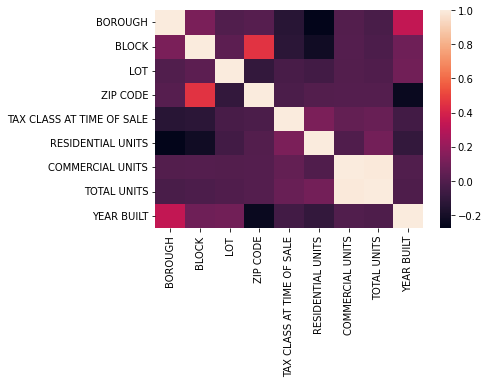

In [12]:
# for categorical variable
print(df_cat.corr())
sns.heatmap(df_cat.corr())

In [13]:
# it shows that TOTAL UNITS and COMMERCIAL UNITS are highly corelated
# so TOTAL UNITS will not be included in the model

# exploration for RESIDENTIAL UNIT and COMMERCIAL UNIT
# plt.bar(x = df_cat['COMMERCIAL UNITS'].value_counts().index, height = df_cat['COMMERCIAL UNITS'].value_counts())
# df_cat['COMMERCIAL UNITS'].value_counts().index
# df_cat['COMMERCIAL UNITS'].value_counts()
df_cat['COMMERCIAL UNITS'].unique()
# sns.barplot(df_cat['COMMERCIAL UNITS'].value_counts().index, df_cat['COMMERCIAL UNITS'].value_counts()).set_title('COMMERCIAL UNITS')

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+01, 4.000e+00,
       5.000e+00, 7.000e+00, 6.000e+00, 2.261e+03, 1.500e+01, 8.000e+00])

In [14]:
df_cat['RESIDENTIAL UNITS'].unique()
# df_cat['COMMERCIAL UNITS'].unique()

array([ 2.,  1.,  8.,  3.,  6.,  0.,  4.,  5., 11.,  7., 12.,  9., 10.,
       28., 14., 16., 20., 13., 18., 27., 17., 43., 15.])

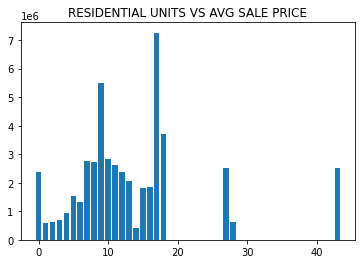

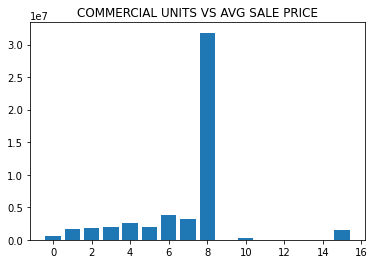

In [15]:
# drop the outlier from COMMERCIAL UNITS
training_data = training_data.loc[training_data['COMMERCIAL UNITS'] < 16]
df_cat = training_data[['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT', 'SALE PRICE']]


df_residential_mean = df_cat.groupby(['RESIDENTIAL UNITS']).agg({'SALE PRICE': 'mean'})
plt.bar(df_residential_mean.index, df_residential_mean['SALE PRICE'])
plt.title('RESIDENTIAL UNITS VS AVG SALE PRICE')
plt.show()

df_commercial_mean = df_cat.groupby(['COMMERCIAL UNITS']).agg({'SALE PRICE': 'mean'})
plt.bar(df_commercial_mean.index, df_commercial_mean['SALE PRICE'])
plt.title('COMMERCIAL UNITS VS AVG SALE PRICE')
plt.show()


In [16]:
# # data cleansing for three numerical variables
# # drop rows where LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT or SALE PRICE is 0
# training_data_drop_0 = training_data.loc[~((training_data['LAND SQUARE FEET'] == 0) | (training_data['GROSS SQUARE FEET'] == 0) | (training_data['YEAR BUILT'] == 0) | (training_data['SALE PRICE'] == 0))]
# training_data_drop_0.describe()

# # NEXT STEP: research about the smallest habitable space; drop outliers
# # identifying values that are outside of the outter fence(Q3 + 3*IQ) to be outliers
# # outter_fence_land = 2800 + 3*()
# # lower_fence_price = 340000 - 1.5 * (730000 - 340000)

# # after researching about the smallest habitable space and the smallest apartment in NYC
# # I decided to drop rows with LAND SQUARE FEET < 60 or GROSS SQUARE FEET < 60
# # in addition, since this dataset includes data from 2003 to 2019, I looked up the 
# training_data_clean = training_data_drop_0.loc[(training_data_drop_0['LAND SQUARE FEET'] >= 60) & (training_data_drop_0['GROSS SQUARE FEET'] >= 60)]
# training_data_clean.describe()

# training_data_clean.sort_values('SALE PRICE').head(20000)
